In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
# データ読み込み
diabetes = load_diabetes()

# 説明変数 (X) と 目的変数 (y) に分ける
X = diabetes.data
y = diabetes.target

# データフレームとして見たいなら
df = pd.DataFrame(X, columns=diabetes.feature_names)
df["target"] = y
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train:', X_train.shape) # => x_train : (353, 10)
print('y_train :', y_train.shape) # => y_train : (353, 1)
print('x_test :', X_test.shape) # => x_test : (89, 10)
print('y_test :', y_test.shape) # => y_test : (89, 1)

x_train: (353, 10)
y_train : (353,)
x_test : (89, 10)
y_test : (89,)


In [27]:
from sklearn.linear_model import ARDRegression

model = ARDRegression()
model.fit(X_train, y_train)


ARDRegression()

In [31]:
r2 = r2_score(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('r2誤差:' ,r2)
print("平均二乗誤差（MSE）:", mse)


r2誤差: 0.4677222716833661
平均二乗誤差（MSE）: 53.10450241718887


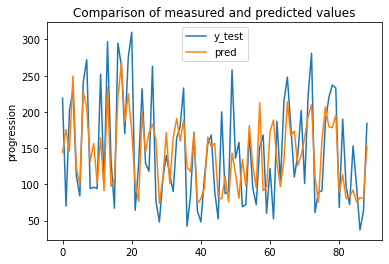

In [35]:
x = np.arange(y_test.shape[0])
plt.title('Comparison of measured and predicted values')
plt.ylabel('progression')
plt.plot(x, y_test, label='y_test')
plt.plot(x, y_pred, label='pred')
plt.legend()
plt.show()


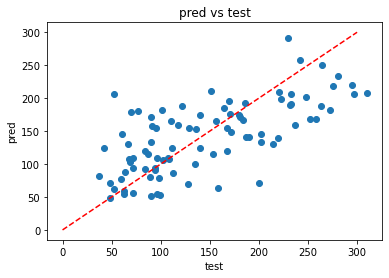

In [9]:
###データを可視化
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("test")
plt.ylabel("pred")
plt.title("pred vs test")
plt.plot([0, 300], [0, 300], 'r--')  # 理想線
plt.show()

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# データ準備
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル一覧
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.1)
}

# 結果を記録
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "モデル": name,
        "MSE": mse,
        "R²スコア": r2
    })

# 結果表示
df_result = pd.DataFrame(results)
print(df_result)


                モデル          MSE     R²スコア
0  LinearRegression  2900.173288  0.452607
1             Ridge  3077.414278  0.419153
2      DecisionTree  4180.573034  0.210937
3      RandomForest  2994.072660  0.434884
4           XGBoost  3686.510058  0.304189


In [16]:
from xgboost import XGBRegressor

xgb_tuned = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_tuned.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 3149.590592144868
R²: 0.40553031667567774


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}
xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # 試す組み合わせ数（大きくすると精度↑）
    scoring='neg_mean_squared_error',
    cv=3,  # 3分割のクロスバリデーション
    verbose=1,
    random_state=42,
    n_jobs=-1  # 全CPU使う
)

random_search.fit(X_train, y_train)

print("最適なパラメータ:", random_search.best_params_)
print("最良のスコア（-MSE）:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
最適なパラメータ: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
最良のスコア（-MSE）: -3556.614850644381


In [18]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Test MSE: 3180.571865926383
Test R²: 0.39968275411951104


In [19]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [20]:
def objective(trial):
    # 試すパラメータを定義
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse  # 最小化したい！


In [21]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # 試行回数はお好みで（10〜100）


[I 2025-04-17 13:36:54,709] A new study created in memory with name: no-name-1c82fe27-e270-4453-b7b7-1ce755e9224a
[I 2025-04-17 13:36:55,062] Trial 0 finished with value: 4059.503901899353 and parameters: {'n_estimators': 494, 'max_depth': 6, 'learning_rate': 0.24047982095671677, 'subsample': 0.6037508256050973, 'colsample_bytree': 0.9416371116637205}. Best is trial 0 with value: 4059.503901899353.
[I 2025-04-17 13:36:55,270] Trial 1 finished with value: 3246.3920974330545 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.2524689795811914, 'subsample': 0.9823629351459928, 'colsample_bytree': 0.7503787034223903}. Best is trial 1 with value: 3246.3920974330545.
[I 2025-04-17 13:36:55,588] Trial 2 finished with value: 3595.3743122145515 and parameters: {'n_estimators': 471, 'max_depth': 8, 'learning_rate': 0.24842749636137273, 'subsample': 0.719377754632587, 'colsample_bytree': 0.7616644932294285}. Best is trial 1 with value: 3246.3920974330545.
[I 2025-04-17 13:36:

In [22]:
print("★ 最適パラメータ:", study.best_params)
print("★ 最小MSE:", study.best_value)

# 最適モデルで予測
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score
print("★ Test R²スコア:", r2_score(y_test, y_pred))


★ 最適パラメータ: {'n_estimators': 275, 'max_depth': 3, 'learning_rate': 0.013440308055954968, 'subsample': 0.892159342149338, 'colsample_bytree': 0.6032411034741562}
★ 最小MSE: 2790.2942917726664
★ Test R²スコア: 0.4677222716833661


In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# データセット読み込み
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant（悪性）, 1 = benign（良性）

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_target=pd.DataFrame(y,columns=['which'])
df_target.head()

df_explain=pd.DataFrame(X)
df_explain.head()
df_explain.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
model = LogisticRegression(max_iter=10000)  # デフォルトだと収束しないことがあるので注意！
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
print("正解率（accuracy）:", accuracy_score(y_test, y_pred))
print("\n詳細レポート:\n", classification_report(y_test, y_pred, target_names=data.target_names))

正解率（accuracy）: 0.956140350877193

詳細レポート:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



,which
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [53]:
(df_target == 0).sum()


which    212
dtype: int64

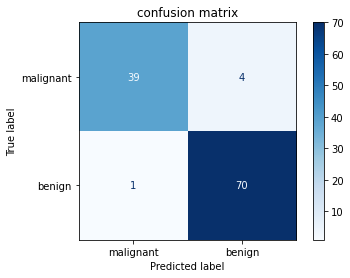

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 予測結果が y_pred、正解が y_test のとき
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

disp.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()


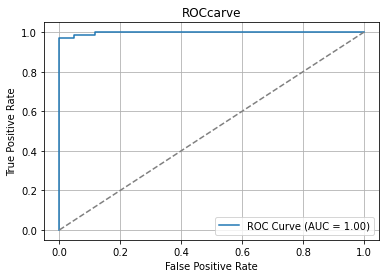

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# y_score は陽性クラス（1）の確率スコア
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # ランダムモデル（参考線）
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROCcarve")
plt.legend()
plt.grid(True)
plt.show()


In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
models = {
    "LogisticRegression": LogisticRegression(max_iter=10000),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    results.append({
        "モデル": name,
        "Accuracy": acc,
        "AUC": auc
    })

df_results = pd.DataFrame(results)
print(df_results)


                  モデル  Accuracy       AUC
0  LogisticRegression  0.956140  0.997707
1                 SVM  0.947368  0.993449
2        RandomForest  0.964912  0.995742
3             XGBoost  0.956140  0.991156
